In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import cmath

## Exercise 1

In [2]:
def normalsolve(A, b):
    '''
    Input is full rank m by n matrix A and vector b of length n, output
    is solution to normal equations by way of QR decomposition
    '''
    #grab QR decomp
    Q, R = la.qr(A, mode = 'economic')[0], la.qr(A, mode = 'economic')[1]
    y = Q.T @ b
    #solve upper-triangular sytem
    x = la.solve_triangular(R, y)
    return x

## Exercise 2

Text(0.5,1,'Housing prices over time')

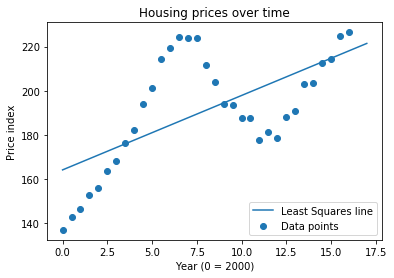

In [3]:
housing = np.load('Data/housing.npy')
A = np.column_stack((housing[:,0], np.ones(len(housing[:,0]))))
b = (housing[:,1])
β1, β0 = normalsolve(A, b)[0], normalsolve(A, b)[1]

plt.scatter(housing[:,0], housing[:,1], label = "Data points")
xgrid = np.linspace(0, 17, 200)
plt.plot(xgrid, β0 + β1 * xgrid, label ="Least Squares line")
plt.legend()
plt.xlabel("Year (0 = 2000)")
plt.ylabel("Price index")
plt.title("Housing prices over time")


## Exercise 3

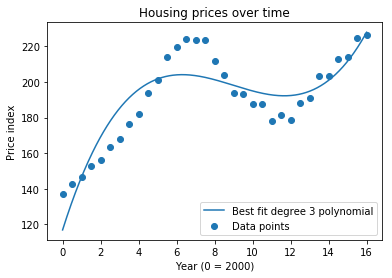

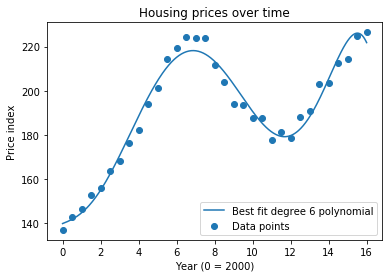

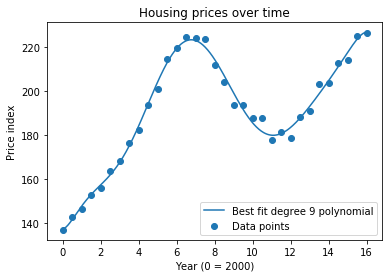

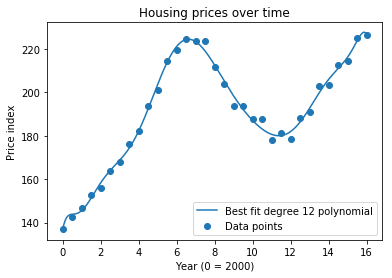

In [10]:

def bestfitpolyn(x, y, deg):
    '''
    Defines the best fit polynomial of degree deg for data series
    x and y. Uses normal equations. Returns a vector of beta 
    coefficients and a polynomial object with the appropriate betas.
    '''
    A = np.vander(x, deg+1)
    betas = normalsolve(A, y)
    f = np.poly1d(betas)
    return betas, f

# Plot
xgrid = np.linspace(0, 16, 500)
for i in [3, 6, 9, 12]:
    plt.scatter(housing[:,0], housing[:,1], label = "Data points")
    plt.plot(xgrid, bestfitpolyn(housing[:,0], housing[:,1], i) \
             [1](xgrid), label = f"Best fit degree {i} polynomial")
    plt.legend()
    plt.xlabel("Year (0 = 2000)")
    plt.ylabel("Price index")
    plt.title("Housing prices over time")
    plt.show()

## Exercise 4

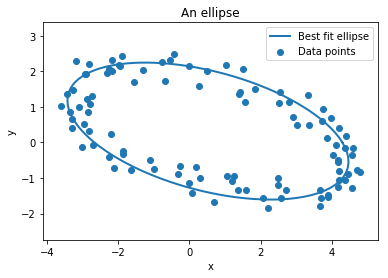

In [16]:
def fitellipse(filename):
    '''
    Function reads in a file and creates the best-fit ellipse.
    Output is a series of betas that are coefficients on the 
    terms for the ellipse expression.
    '''
    data = np.load(filename)
    #Choose first column x, second column y.
    x, y = data[:,0], data[:,1]
    n = len(x)
    #matrix of ones for right side
    b = np.ones(n)
    #initialize A (order: x^2, x, xy, y, y^2)
    A = np.column_stack((x ** 2, x, x * y, y, y ** 2))
    #Solve normal equations
    betas = normalsolve(A, b)
    return betas

def plot_ellipse(a, b, c, d, e, filename):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2, label = "Best fit ellipse")
    plt.gca().set_aspect("equal", "datalim")
    
    #Plot
    data = np.load(filename)
    #Choose first column x, second column y.
    x, y = data[:,0], data[:,1]
    plt.scatter(x, y, label = "Data points")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("An ellipse")
    
a = fitellipse('Data/ellipse.npy')[0]
b = fitellipse('Data/ellipse.npy')[1]
c = fitellipse('Data/ellipse.npy')[2]
d = fitellipse('Data/ellipse.npy')[3]
e = fitellipse('Data/ellipse.npy')[4]

plot_ellipse(a, b, c, d, e, 'Data/ellipse.npy')
plt.legend()



## Exercise 5

In [17]:
## Power Method
def powermethod(A, maxiter = 3000 , tol=.000001):
    '''
    Input is a square matrix A, and parameters governing the tolerance 
    of the algorithm. Output is the largest eigenvalue of A and its 
    eigenvector.
    '''
    m, n = A.shape[0], A.shape[1] 
    x = np.random.random(n)
    x = x / la.norm(x)
    xdist = 7
    it = 0
    while (xdist > tol) & (it < maxiter):
        xnew = A @ x
        xnew = xnew / la.norm(xnew)
        xdist = la.norm(xnew - x)
        print("iter =", it, ", xdist =", xdist)
        x = xnew
        it += 1
        if it == maxiter:
            print(f"Warning - failed to converge after {it} iterations")
    eigval = x.T @ A @ x
    eigvec = x
    return eigval, eigvec

A = np.random.rand(4, 4)
powermethod(A)

iter = 0 , xdist = 0.39763209816490724
iter = 1 , xdist = 0.07345838455592436
iter = 2 , xdist = 0.015000558396169112
iter = 3 , xdist = 0.0032820247978921063
iter = 4 , xdist = 0.0007344938772115934
iter = 5 , xdist = 0.00016568178907610463
iter = 6 , xdist = 3.7487679820068364e-05
iter = 7 , xdist = 8.492810984050088e-06
iter = 8 , xdist = 1.9250876165807067e-06
iter = 9 , xdist = 4.364686504173233e-07


(2.536840217325569, array([0.43715647, 0.49447321, 0.57646411, 0.48174641]))

## Exercise 6

In [18]:
def QRalg(A, N = 3000, tol = .0000001):
    m, n = A.shape[0], A.shape[1]
    #First step - compute Hessenberg of A
    S = la.hessenberg(A)
    #Get block matrix S.
    for i in range(N):
        Q, R = la.qr(S)[0], la.qr(S)[1]
        S = R @ Q
       #print("at iter", i, S)
    #Pull eigenvalues from blocks
    eigs = []
    i = 0
    print("n = ", n)
    while i < n:
        if (i != n-1):
            if (np.abs(S[i+1, i]) < tol):
                # 1- block (by checking the bottom left)
                eigs = eigs + [S[i, i]]
            else:
                # 2-block - must calculate eigenvalues
                # Use quadratic formula in char. polyn.
                a = 1
                b = -(S[i,i] + S[i+1,i+1])
                c = (S[i,i]*S[i+1,i+1] - S[i, i+1]*S[i+1,i])
                root1 = (-b + cmath.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
                root2 = (-b - cmath.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
                eigs = eigs + [root1, root2]
                i +=1
        else: 
            #1- block (is bottom right of whole matrix)
            eigs = eigs + [S[i, i]]
        i += 1
    return eigs

A = np.random.rand(10, 10)
print("Me:", QRalg(A), "scipy:", la.eig(A)[0])

n =  10
Me: [4.788355736572114, 0.7810929211718343, -0.6661019433098364, 0.6560940332272178, (-0.08833476738132498+0.6003786876915324j), (-0.08833476738132498-0.6003786876915324j), (0.22364657850987094+0.5473123709702828j), (0.22364657850987094-0.5473123709702828j), (-0.3600493662626455+0.2228289584858172j), (-0.3600493662626455-0.2228289584858172j)] scipy: [ 4.78835574+0.j          0.78109292+0.j          0.65609403+0.j
  0.22364658+0.54731237j  0.22364658-0.54731237j -0.08833477+0.60037869j
 -0.08833477-0.60037869j -0.66610194+0.j         -0.36004937+0.22282896j
 -0.36004937-0.22282896j]
